In [31]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

In [41]:
dtrain = pd.read_csv('data/train.csv')
dtest = pd.read_csv('data/test.csv')

## Asiding the response variable

In [42]:
response = dtrain.Purchase
dtrain.drop(['Purchase'], inplace=True, axis=1)

In [43]:
dtrain.shape

(550068, 11)

In [46]:
dtest.shape

(233599, 11)

In [47]:
dtrain.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [49]:
dtest.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Cleaning the data

### Feature Creation

#### 1. Age

In [50]:
def split_age(age, which):
    if which == 'lower':
        if age[2] != '+':
            return int(age.split('-')[0])
        else:
            return int(age.split('+')[0])
    elif which == 'upper':
        if age[2] != '+':
            return int(age.split('-')[1])
        else:
            return 80 # Because average maximum age is 80

In [51]:
dtrain['lower_age'] = dtrain.Age.apply(lambda row: split_age(row, 'lower'))
dtrain['upper_age'] = dtrain.Age.apply(lambda row: split_age(row, 'upper'))
dtrain['mean_age'] = (dtrain.lower_age + dtrain.upper_age) / 2.0

dtest['lower_age'] = dtest.Age.apply(lambda row: split_age(row, 'lower'))
dtest['upper_age'] = dtest.Age.apply(lambda row: split_age(row, 'upper'))
dtest['mean_age'] = (dtest.lower_age + dtest.upper_age) / 2.0

In [52]:
dtrain.drop(['Age', 'lower_age', 'upper_age'], inplace=True, axis=1)
dtest.drop(['Age', 'lower_age', 'upper_age'], inplace=True, axis=1)

In [53]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,8.5
4,1000002,P00285442,M,16,C,4+,0,8,NaN,NaN,67.5


In [54]:
dtest.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000004,P00128942,M,7,B,2,1,1,11.0,NaN,48.0
1,1000009,P00113442,M,17,C,0,0,3,5.0,NaN,30.5
2,1000010,P00288442,F,1,B,4+,1,5,14.0,NaN,40.5
3,1000010,P00145342,F,1,B,4+,1,4,9.0,NaN,40.5
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,30.5


#### 2. Stay_In_Current_City_Years

In [55]:
print(dtrain.Stay_In_Current_City_Years.unique())
print(dtest.Stay_In_Current_City_Years.unique())

['2' '4+' '3' '1' '0']
['2' '0' '4+' '1' '3']


In [56]:
dtrain.loc[dtrain.Stay_In_Current_City_Years == '4+', 'Stay_In_Current_City_Years'] = '4'
dtrain['Stay_In_Current_City_Years'] = dtrain.Stay_In_Current_City_Years.astype(int)

dtest.loc[dtest.Stay_In_Current_City_Years == '4+', 'Stay_In_Current_City_Years'] = '4'
dtest['Stay_In_Current_City_Years'] = dtest.Stay_In_Current_City_Years.astype(int)

## Filling the NAs

In [57]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,8.5
4,1000002,P00285442,M,16,C,4,0,8,NaN,NaN,67.5


In [58]:
dtest.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000004,P00128942,M,7,B,2,1,1,11.0,NaN,48.0
1,1000009,P00113442,M,17,C,0,0,3,5.0,NaN,30.5
2,1000010,P00288442,F,1,B,4,1,5,14.0,NaN,40.5
3,1000010,P00145342,F,1,B,4,1,4,9.0,NaN,40.5
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,30.5


In [59]:
dtrain.fillna(-999, inplace=True)
dtest.fillna(-999, inplace=True)

In [60]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000001,P00069042,F,10,A,2,0,3,-999.0,-999.0,8.5
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,8.5
2,1000001,P00087842,F,10,A,2,0,12,-999.0,-999.0,8.5
3,1000001,P00085442,F,10,A,2,0,12,14.0,-999.0,8.5
4,1000002,P00285442,M,16,C,4,0,8,-999.0,-999.0,67.5


In [61]:
dtest.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,1000004,P00128942,M,7,B,2,1,1,11.0,-999.0,48.0
1,1000009,P00113442,M,17,C,0,0,3,5.0,-999.0,30.5
2,1000010,P00288442,F,1,B,4,1,5,14.0,-999.0,40.5
3,1000010,P00145342,F,1,B,4,1,4,9.0,-999.0,40.5
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,30.5


In [62]:
dtrain.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
mean_age                      float64
dtype: object

In [63]:
dtest.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
mean_age                      float64
dtype: object

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
dtrain.Gender.unique()

array(['F', 'M'], dtype=object)

In [66]:
dtest.Gender.unique()

array(['M', 'F'], dtype=object)

In [67]:
le = LabelEncoder()
gender_dummy_train = pd.get_dummies(dtrain.Gender)
dtrain['City_Category'] = le.fit_transform(dtrain.City_Category)
dtrain['User_ID'] = le.fit_transform(dtrain.User_ID)
dtrain['Product_ID'] = le.fit_transform(dtrain.Product_ID)

gender_dummy_test = pd.get_dummies(dtest.Gender)
dtest['City_Category'] = le.fit_transform(dtest.City_Category)
dtest['User_ID'] = le.fit_transform(dtest.User_ID)
dtest['Product_ID'] = le.fit_transform(dtest.Product_ID)

In [68]:
dtrain.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,0,672,F,10,0,2,0,3,-999.0,-999.0,8.5
1,0,2376,F,10,0,2,0,1,6.0,14.0,8.5
2,0,852,F,10,0,2,0,12,-999.0,-999.0,8.5
3,0,828,F,10,0,2,0,12,14.0,-999.0,8.5
4,1,2734,M,16,2,4,0,8,-999.0,-999.0,67.5


In [69]:
dtest.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age
0,3,1144,M,7,1,2,1,1,11.0,-999.0,48.0
1,8,994,M,17,2,0,0,3,5.0,-999.0,30.5
2,9,2672,F,1,1,4,1,5,14.0,-999.0,40.5
3,9,1299,F,1,1,4,1,4,9.0,-999.0,40.5
4,10,519,F,1,2,1,0,4,5.0,12.0,30.5


In [70]:
dtrain = pd.concat([dtrain, gender_dummy_train], axis=1)
dtrain.drop('Gender', axis=1, inplace=True)

dtest = pd.concat([dtest, gender_dummy_test], axis=1)
dtest.drop('Gender', axis=1, inplace=True)

In [71]:
dtrain.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age,F,M
0,0,672,10,0,2,0,3,-999.0,-999.0,8.5,1,0
1,0,2376,10,0,2,0,1,6.0,14.0,8.5,1,0
2,0,852,10,0,2,0,12,-999.0,-999.0,8.5,1,0
3,0,828,10,0,2,0,12,14.0,-999.0,8.5,1,0
4,1,2734,16,2,4,0,8,-999.0,-999.0,67.5,0,1


In [72]:
dtest.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age,F,M
0,3,1144,7,1,2,1,1,11.0,-999.0,48.0,0,1
1,8,994,17,2,0,0,3,5.0,-999.0,30.5,0,1
2,9,2672,1,1,4,1,5,14.0,-999.0,40.5,1,0
3,9,1299,1,1,4,1,4,9.0,-999.0,40.5,1,0
4,10,519,1,2,1,0,4,5.0,12.0,30.5,1,0


In [73]:
dtrain.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,mean_age,F,M
0,0,672,10,0,2,0,3,-999.0,-999.0,8.5,1,0
1,0,2376,10,0,2,0,1,6.0,14.0,8.5,1,0
2,0,852,10,0,2,0,12,-999.0,-999.0,8.5,1,0
3,0,828,10,0,2,0,12,14.0,-999.0,8.5,1,0
4,1,2734,16,2,4,0,8,-999.0,-999.0,67.5,0,1


In [74]:
dtrain.loc[:, 'Purchase'] = response
dtest.to_csv('data/cleaned_test.csv', index=False)
dtrain.to_csv('data/cleaned_train.csv', index=False)

## Variable Importance

In [75]:
import xgboost as xgb
from pprint import pprint
import operator

/home/mayukh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
def xgb_feature_importance(features, labels, num_rounds, fnames="*"):
    if fnames == "*":
        pass
    else:
        # // TODO Implement feature selection later
        pass
    
    param = {}
    param['objective'] = 'reg:linear'
    param['eta'] = 0.01
    param['max_depth'] = 8
    param['seed'] = 42
    param['nthread'] = -1
    param['eval_metric'] = "rmse"
    param['silent'] = 1
    dtrain = xgb.DMatrix(features, label=labels)
    watchlist = [(dtrain, 'train')]
    gbdt = xgb.train(param, dtrain, num_rounds, watchlist)
    importance = gbdt.get_fscore()
    importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)
    df = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df['fscore'] = df['fscore'] / df['fscore'].sum()
    plt.figure()
    df.plot()
    df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.xlabel('relative importance')
    plt.show()

[0]	train-rmse:10440.1
[1]	train-rmse:10343.6
[2]	train-rmse:10248.2
[3]	train-rmse:10153.7
[4]	train-rmse:10060.3
[5]	train-rmse:9967.92
[6]	train-rmse:9876.54
[7]	train-rmse:9786.16
[8]	train-rmse:9696.72
[9]	train-rmse:9608.28
[10]	train-rmse:9520.81
[11]	train-rmse:9434.28
[12]	train-rmse:9348.71
[13]	train-rmse:9264.07
[14]	train-rmse:9180.37
[15]	train-rmse:9097.54
[16]	train-rmse:9015.65
[17]	train-rmse:8934.65
[18]	train-rmse:8854.54
[19]	train-rmse:8775.34
[20]	train-rmse:8696.89
[21]	train-rmse:8619.36
[22]	train-rmse:8542.69
[23]	train-rmse:8466.83
[24]	train-rmse:8391.88
[25]	train-rmse:8317.7
[26]	train-rmse:8244.37
[27]	train-rmse:8171.87
[28]	train-rmse:8100.19
[29]	train-rmse:8029.29
[30]	train-rmse:7959.21
[31]	train-rmse:7889.89
[32]	train-rmse:7821.37
[33]	train-rmse:7753.64
[34]	train-rmse:7686.68
[35]	train-rmse:7620.45
[36]	train-rmse:7554.97
[37]	train-rmse:7490.23
[38]	train-rmse:7426.25
[39]	train-rmse:7363
[40]	train-rmse:7300.46
[41]	train-rmse:7238.62
[42]	t

[334]	train-rmse:2764.8
[335]	train-rmse:2764.09
[336]	train-rmse:2763.27
[337]	train-rmse:2762.55
[338]	train-rmse:2761.72
[339]	train-rmse:2760.86
[340]	train-rmse:2760.17
[341]	train-rmse:2759.39
[342]	train-rmse:2758.52
[343]	train-rmse:2757.83
[344]	train-rmse:2757.06
[345]	train-rmse:2756.44
[346]	train-rmse:2755.81
[347]	train-rmse:2755.02
[348]	train-rmse:2754.25
[349]	train-rmse:2753.64
[350]	train-rmse:2752.97
[351]	train-rmse:2752.33
[352]	train-rmse:2751.57
[353]	train-rmse:2750.99
[354]	train-rmse:2750.27
[355]	train-rmse:2749.53
[356]	train-rmse:2748.98
[357]	train-rmse:2748.41
[358]	train-rmse:2747.74
[359]	train-rmse:2747.05
[360]	train-rmse:2746.53
[361]	train-rmse:2745.79
[362]	train-rmse:2745.24
[363]	train-rmse:2744.71
[364]	train-rmse:2744.04
[365]	train-rmse:2743.39
[366]	train-rmse:2742.88
[367]	train-rmse:2742.21
[368]	train-rmse:2741.68
[369]	train-rmse:2741.18
[370]	train-rmse:2740.66
[371]	train-rmse:2740.16
[372]	train-rmse:2739.64
[373]	train-rmse:2738.93
[

[664]	train-rmse:2649.31
[665]	train-rmse:2649.21
[666]	train-rmse:2649.08
[667]	train-rmse:2648.81
[668]	train-rmse:2648.67
[669]	train-rmse:2648.43
[670]	train-rmse:2648.36
[671]	train-rmse:2648.09
[672]	train-rmse:2647.98
[673]	train-rmse:2647.82
[674]	train-rmse:2647.68
[675]	train-rmse:2647.55
[676]	train-rmse:2647.43
[677]	train-rmse:2647.31
[678]	train-rmse:2647.05
[679]	train-rmse:2646.88
[680]	train-rmse:2646.63
[681]	train-rmse:2646.53
[682]	train-rmse:2646.35
[683]	train-rmse:2646.21
[684]	train-rmse:2645.98
[685]	train-rmse:2645.77
[686]	train-rmse:2645.65
[687]	train-rmse:2645.56
[688]	train-rmse:2645.39
[689]	train-rmse:2645.26
[690]	train-rmse:2645.01
[691]	train-rmse:2644.79
[692]	train-rmse:2644.72
[693]	train-rmse:2644.52
[694]	train-rmse:2644.41
[695]	train-rmse:2644.17
[696]	train-rmse:2644.08
[697]	train-rmse:2643.85
[698]	train-rmse:2643.63
[699]	train-rmse:2643.5
[700]	train-rmse:2643.37
[701]	train-rmse:2643.22
[702]	train-rmse:2643.15
[703]	train-rmse:2642.93
[

[994]	train-rmse:2601.28
[995]	train-rmse:2601.12
[996]	train-rmse:2601.02
[997]	train-rmse:2600.82
[998]	train-rmse:2600.67
[999]	train-rmse:2600.57


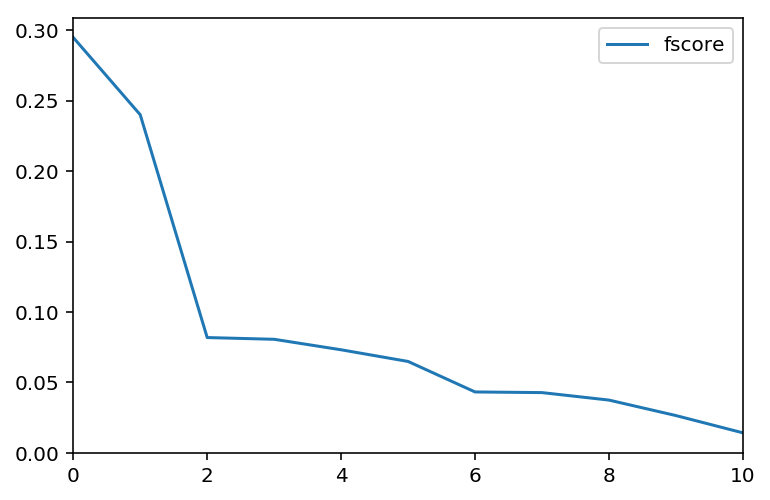

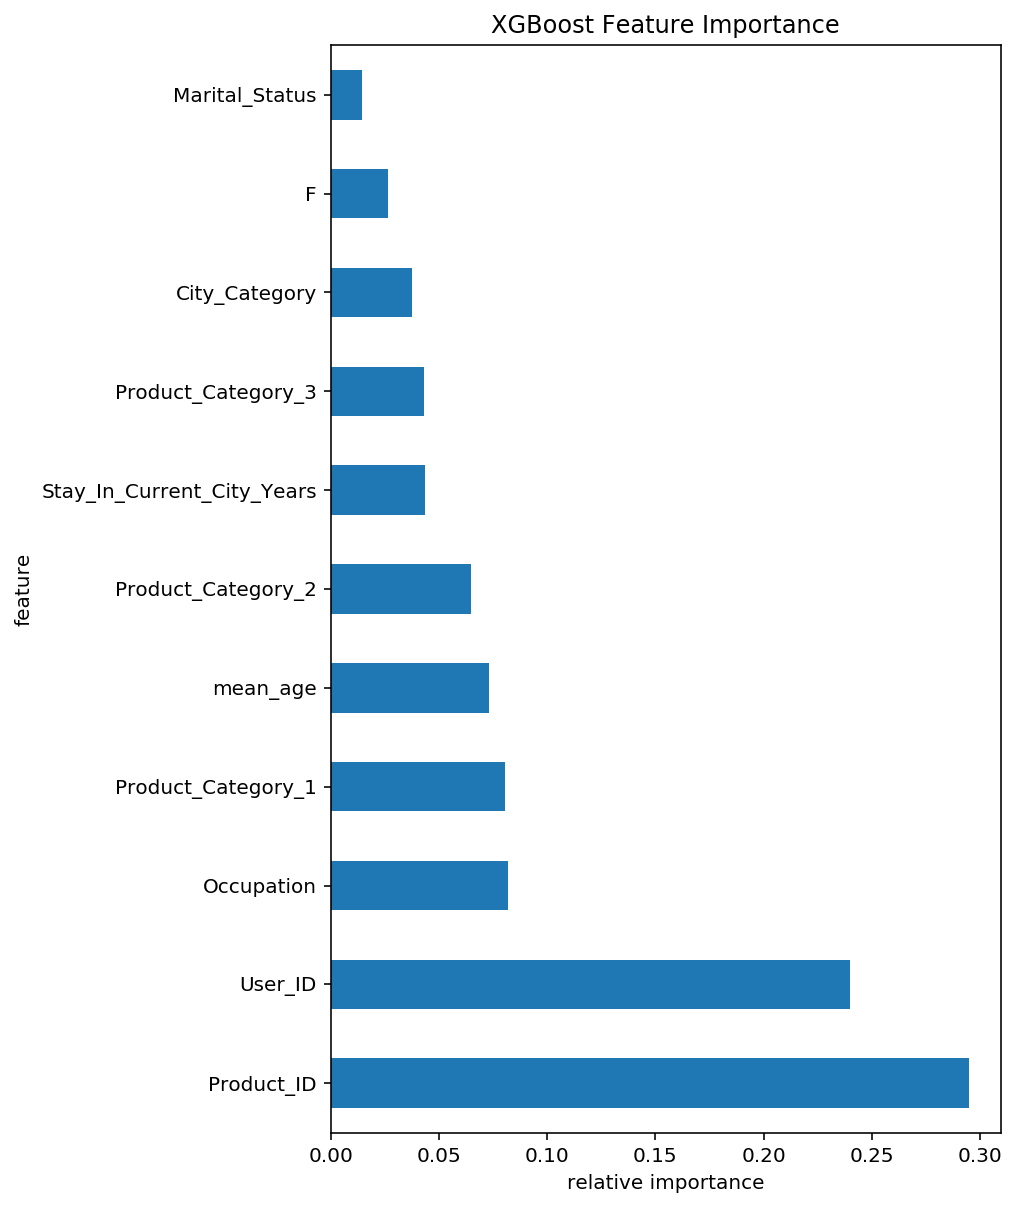

In [77]:
dtrain = pd.read_csv('data/cleaned_train.csv')
features = dtrain.iloc[:, 0:-1]
labels = dtrain.Purchase
xgb_feature_importance(features, labels, 1000)

## Variable importance with feature selection

[0]	train-rmse:10440.3
[1]	train-rmse:10343.9
[2]	train-rmse:10248.5
[3]	train-rmse:10154.2
[4]	train-rmse:10060.9
[5]	train-rmse:9968.6
[6]	train-rmse:9877.29
[7]	train-rmse:9786.97
[8]	train-rmse:9697.65
[9]	train-rmse:9609.29
[10]	train-rmse:9521.88
[11]	train-rmse:9435.43
[12]	train-rmse:9349.93
[13]	train-rmse:9265.36
[14]	train-rmse:9181.73
[15]	train-rmse:9099
[16]	train-rmse:9017.2
[17]	train-rmse:8936.29
[18]	train-rmse:8856.28
[19]	train-rmse:8777.14
[20]	train-rmse:8698.9
[21]	train-rmse:8621.53
[22]	train-rmse:8545
[23]	train-rmse:8469.33
[24]	train-rmse:8394.47
[25]	train-rmse:8320.47
[26]	train-rmse:8247.3
[27]	train-rmse:8174.93
[28]	train-rmse:8103.35
[29]	train-rmse:8032.61
[30]	train-rmse:7962.67
[31]	train-rmse:7893.47
[32]	train-rmse:7825.09
[33]	train-rmse:7757.47
[34]	train-rmse:7690.61
[35]	train-rmse:7624.51
[36]	train-rmse:7559.15
[37]	train-rmse:7494.51
[38]	train-rmse:7430.65
[39]	train-rmse:7367.5
[40]	train-rmse:7305.1
[41]	train-rmse:7243.36
[42]	train-rms

[335]	train-rmse:2796.98
[336]	train-rmse:2796.29
[337]	train-rmse:2795.53
[338]	train-rmse:2794.8
[339]	train-rmse:2794.03
[340]	train-rmse:2793.23
[341]	train-rmse:2792.56
[342]	train-rmse:2791.87
[343]	train-rmse:2791.22
[344]	train-rmse:2790.54
[345]	train-rmse:2789.77
[346]	train-rmse:2789.12
[347]	train-rmse:2788.5
[348]	train-rmse:2787.7
[349]	train-rmse:2786.74
[350]	train-rmse:2786.15
[351]	train-rmse:2785.49
[352]	train-rmse:2784.53
[353]	train-rmse:2783.97
[354]	train-rmse:2783.27
[355]	train-rmse:2782.68
[356]	train-rmse:2781.98
[357]	train-rmse:2781.43
[358]	train-rmse:2780.81
[359]	train-rmse:2780.2
[360]	train-rmse:2779.66
[361]	train-rmse:2778.9
[362]	train-rmse:2778.41
[363]	train-rmse:2777.75
[364]	train-rmse:2777.19
[365]	train-rmse:2776.68
[366]	train-rmse:2775.84
[367]	train-rmse:2775.13
[368]	train-rmse:2774.66
[369]	train-rmse:2773.84
[370]	train-rmse:2773.28
[371]	train-rmse:2772.74
[372]	train-rmse:2772.28
[373]	train-rmse:2771.85
[374]	train-rmse:2771.36
[375]

[664]	train-rmse:2678.16
[665]	train-rmse:2678
[666]	train-rmse:2677.84
[667]	train-rmse:2677.76
[668]	train-rmse:2677.64
[669]	train-rmse:2677.47
[670]	train-rmse:2677.33
[671]	train-rmse:2677.08
[672]	train-rmse:2676.77
[673]	train-rmse:2676.68
[674]	train-rmse:2676.51
[675]	train-rmse:2676.35
[676]	train-rmse:2676.22
[677]	train-rmse:2676.06
[678]	train-rmse:2675.75
[679]	train-rmse:2675.62
[680]	train-rmse:2675.47
[681]	train-rmse:2675.3
[682]	train-rmse:2675.24
[683]	train-rmse:2675.11
[684]	train-rmse:2674.9
[685]	train-rmse:2674.72
[686]	train-rmse:2674.4
[687]	train-rmse:2674.1
[688]	train-rmse:2673.95
[689]	train-rmse:2673.87
[690]	train-rmse:2673.76
[691]	train-rmse:2673.6
[692]	train-rmse:2673.46
[693]	train-rmse:2673.29
[694]	train-rmse:2673.2
[695]	train-rmse:2672.91
[696]	train-rmse:2672.73
[697]	train-rmse:2672.6
[698]	train-rmse:2672.45
[699]	train-rmse:2672.29
[700]	train-rmse:2672.2
[701]	train-rmse:2671.89
[702]	train-rmse:2671.69
[703]	train-rmse:2671.54
[704]	train

[994]	train-rmse:2630.49
[995]	train-rmse:2630.3
[996]	train-rmse:2630.15
[997]	train-rmse:2629.96
[998]	train-rmse:2629.85
[999]	train-rmse:2629.75


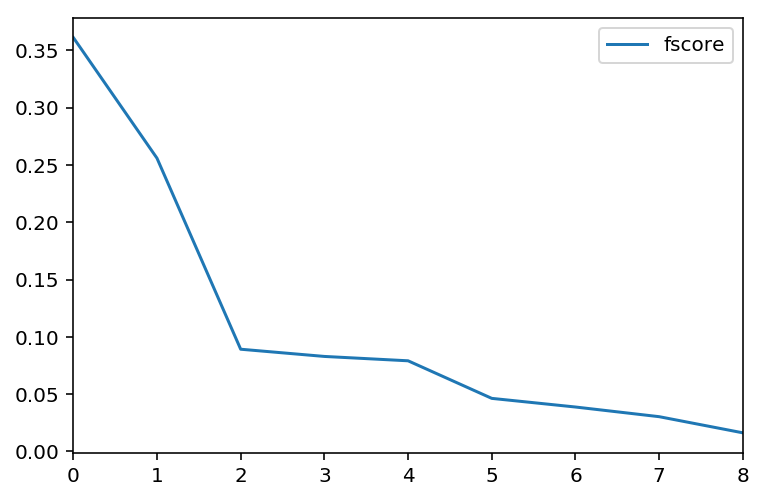

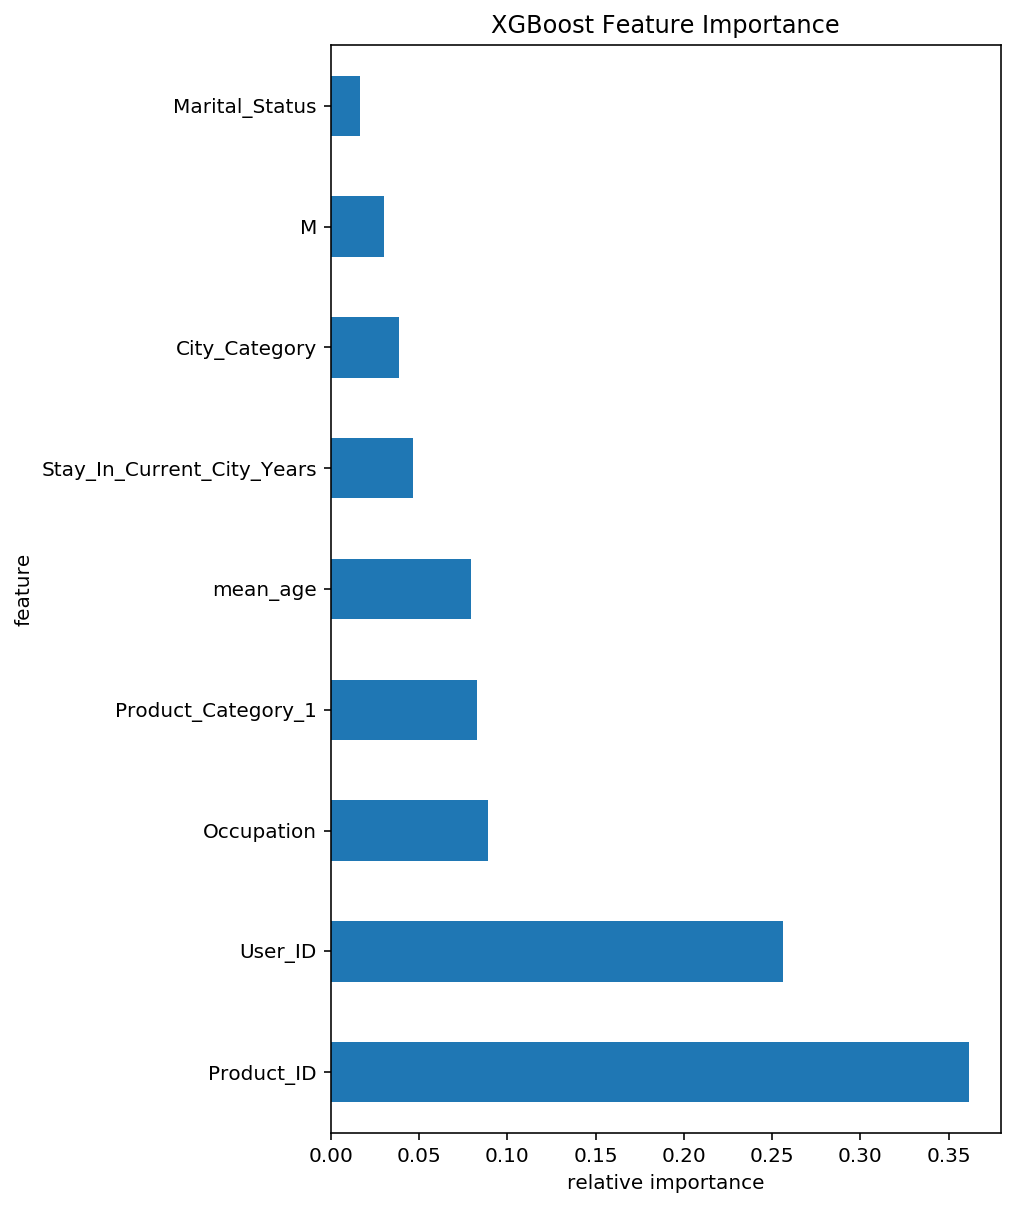

In [78]:
cols = [
    'User_ID',
    'Product_ID',
    'M',
    'F',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'mean_age',
    'Purchase'
]
train = dtrain[cols]

features = train.iloc[:, 0:-1]
labels = train.Purchase
xgb_feature_importance(features, labels, 1000)